### Given code

In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def get_a(deg_true):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    
    Returns:
    a: (np array of size (deg_true + 1)) coefficients of polynomial g
    """
    return 5 * np.random.randn(deg_true + 1)

In [43]:
def get_design_mat(x, deg):
    """
    Inputs:
    x: (np.array of size N)
    deg: (int) max degree used to generate the design matrix
    
    Returns:
    X: (np.array of size N x (deg_true + 1)) design matrix
    """
    X = np.array([x ** i for i in range(deg + 1)]).T
    return X

In [44]:
def draw_sample(deg_true, a, N):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    x = np.sort(np.random.rand(N))
    X = get_design_mat(x, deg_true)
    y = X @ a
    return x, y

In [45]:
def draw_sample_with_noise(deg_true, a, N):  
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """  
    x = np.random.rand(N)
    X = get_design_mat(x, deg_true)
    y = X @ a + np.random.randn(N)
    return x, y

### Problem 7

In [46]:
d=2
a = get_a(d)
x_train, y_train = draw_sample(d, a, 10)
x_test, y_test = draw_sample(d, a, 1000)

X_train = get_design_mat(x_train, d)
X_test = get_design_mat(x_test, d)

In [47]:
def least_square_estimator(X_train, y_train):
    
    if X_train.shape[0] <= X_train.shape[1] - 1:
        raise ValueError("Incorrect size!")
    
    coefficients = np.linalg.pinv(X_train) @ y_train
    
    return coefficients

In [48]:
coefficients = least_square_estimator(X_train, y_train)

### Problem 8

In [49]:
def empirical_risk(X, y, coefficients):
    
    risk = 1/len(y) * np.sum(0.5*(y - X @ coefficients)**2)
    return risk

empirical_risk(X_test, y_test, coefficients)

1.470424401380322e-31

### Problem 9

In [50]:
def underlying_function(x, degree):
    return np.array([x**i for i in range(degree+1)])

In [51]:
deg_true = 5

a = get_a(deg_true)
x_train, y_train = draw_sample(deg_true, a, 10)
x_test, y_test = draw_sample(deg_true, a, 1000)

X_train = get_design_mat(x_train, deg_true)
X_test = get_design_mat(x_test, try_deg)
coefficients = least_square_estimator(X_train, y_train)

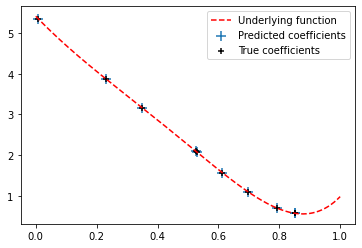

In [52]:
plt.scatter(x_train, X_train @ coefficients, marker='+', s=100, label='Predicted coefficients')
plt.scatter(x_train, X_train @ a, linestyle='-', marker='+', color='k', label='True coefficients')

x = np.linspace(0,1,1000)
y_true = a @ underlying_function(x, deg_true)
plt.plot(x, y_true, color = 'r', label='Underlying function', linestyle='dashed')
plt.legend()
plt.show()

### Problem 10

In [53]:
deg_true = 2

a = get_a(deg_true)
x_train, y_train = draw_sample(deg_true, a, 10)
x_test, y_test = draw_sample(deg_true, a, 1000)

for try_deg in range(9):
    X_train = get_design_mat(x_train, try_deg)
    X_test = get_design_mat(x_test, try_deg)
    coefficients = least_square_estimator(X_train, y_train)
    print('Using a function of degree {} - Empirical risk: {}'.format(try_deg, empirical_risk(X_test, y_test, coefficients)))

Using a function of degree 0 - Empirical risk: 2.0003269366487517
Using a function of degree 1 - Empirical risk: 0.24645802920659107
Using a function of degree 2 - Empirical risk: 2.1807984647009853e-30
Using a function of degree 3 - Empirical risk: 1.3155594351845748e-28
Using a function of degree 4 - Empirical risk: 1.030367890626886e-26
Using a function of degree 5 - Empirical risk: 5.50958879320439e-25
Using a function of degree 6 - Empirical risk: 1.5738071016349374e-21
Using a function of degree 7 - Empirical risk: 1.636661262820089e-18
Using a function of degree 8 - Empirical risk: 2.2989374609635695e-16


This confirms our conclusion about approximation error above. The minimum value for which we get a perfect fit is the true degree (2). But any function with d >= 2 is also a risk minimizer because the extra coefficients simply go to 0.

### Problem 11

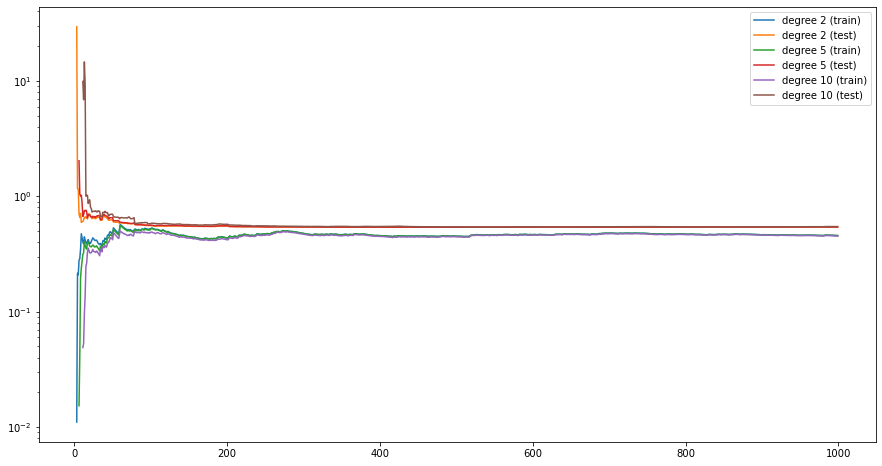

In [54]:
plt.figure(figsize=(15, 8))

deg_true = 2

N = 1000
a = get_a(deg_true)
x_train, y_train = draw_sample_with_noise(deg_true, a, N)
x_test, y_test = draw_sample_with_noise(deg_true, a, N)

for deg in [2,5,10]:
    e_t, e_g = [], []
    
    for i in range(deg+1,N):
        X_train = get_design_mat(x_train[0:i+1], deg) #Create train set with degree d
        X_test = get_design_mat(x_test, deg) #Create test set with degree d

        coefficients = least_square_estimator(X_train, y_train[0:i+1])
        e_t.append(empirical_risk(X_train, y_train[0:i+1], coefficients))
        e_g.append(empirical_risk(X_test, y_test, coefficients))

    x = list(range(deg+1,1000))
    plt.plot(x, e_t, label='degree %d (train)' %deg)
    plt.plot(x, e_g, label='degree %d (test)' %deg)
    plt.yscale("log")
    plt.legend()

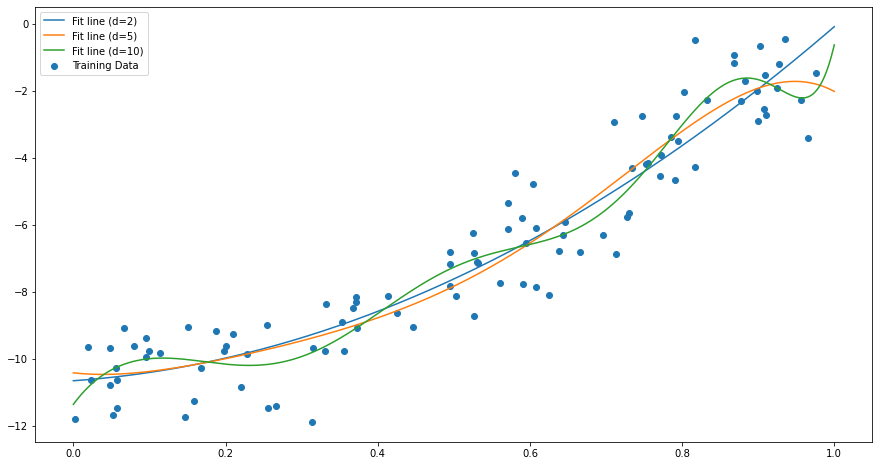

In [55]:
plt.figure(figsize=(15, 8))

N, deg_true = 100, 2

a = get_a(deg_true)
x_train, y_train = draw_sample_with_noise(deg_true, a, 1000)
x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)

plt.scatter(x_train[0:N], y_train[0:N], label='Training Data')

for deg in [2, 5, 10]:
    
    X_train = get_design_mat(x_train, deg) #Create train set with degree d
    
    coefficients = least_square_estimator(X_train[0:N, :], y_train[0:N])
    
    x = np.linspace(0,1,1000)
    func_result = coefficients @ underlying_function(x, deg)
    
    plt.plot(x, func_result, label='Fit line (d=%d)' %deg)
    plt.legend()
plt.show()

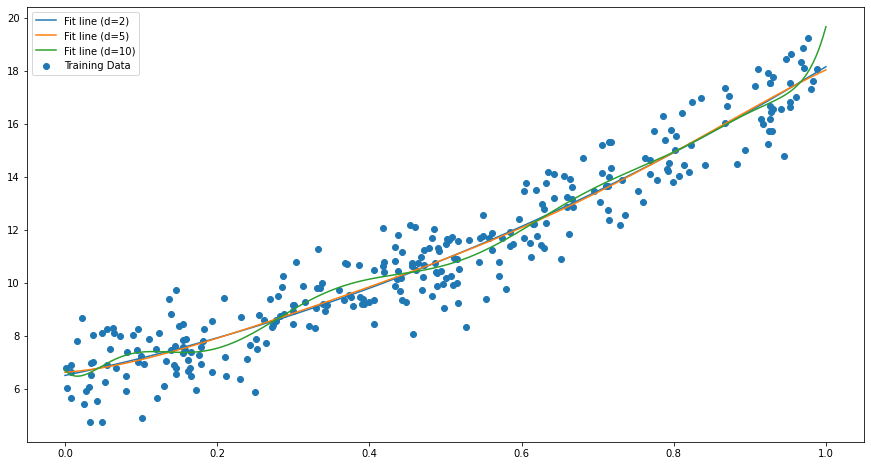

In [56]:
plt.figure(figsize=(15, 8))

N, deg_true = 300, 2

a = get_a(deg_true)
x_train, y_train = draw_sample_with_noise(deg_true, a, 1000)
x_test, y_test = draw_sample_with_noise(deg_true, a, 1000)

plt.scatter(x_train[0:N], y_train[0:N], label='Training Data')

for deg in [2, 5, 10]:
    
    X_train = get_design_mat(x_train, deg) #Create train set with degree d
    
    coefficients = least_square_estimator(X_train[0:N, :], y_train[0:N])
    
    x = np.linspace(0,1,1000)
    func_result = coefficients @ underlying_function(x, deg)
    
    plt.plot(x, func_result, label='Fit line (d=%d)' %deg)
    plt.legend()
plt.show()

### Question 12

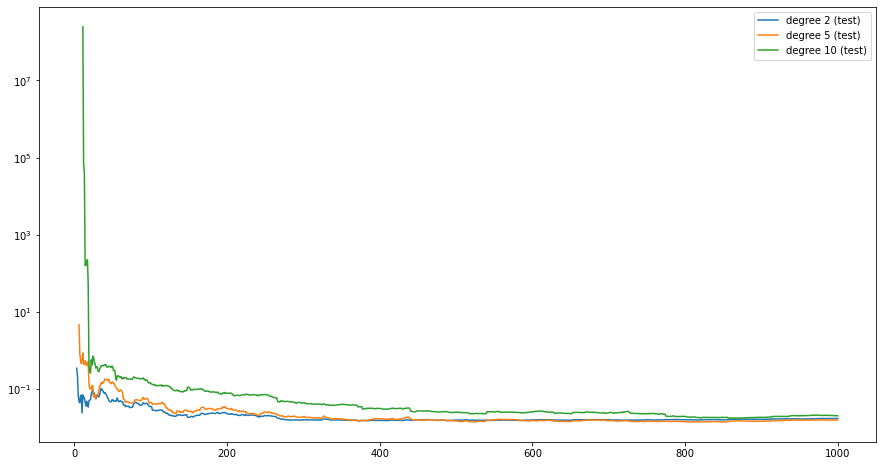

In [58]:
plt.figure(figsize=(15, 8))

d = 2
a = get_a(d)
x_train, y_train = draw_sample_with_noise(d, a, 1000)
x_test, y_test = draw_sample_with_noise(d, a, 1000)

for deg in [2, 5, 10]:
    
    X_train = get_design_mat(x_train, deg) #Create train set with degree d
    X_test = get_design_mat(x_test, deg) #Create test set with degree d
    
    est_error = []
    for i in range(1,1000-deg):
        coefficients = least_square_estimator(X_train[0:deg+i,:], y_train[0:deg+i])
        
        est_error.append(empirical_risk(X_test, y_test, coefficients) - 1 + 0.5) #0.5 is added to correct for the 1/2 in the loss function
    
    x = np.linspace(deg+1, 1000, 1000-(deg+1))
    plt.plot(x, est_error, label='degree %d (test)' %deg)
    plt.yscale("log")
    plt.legend()

Total error = Approximation error + Estimation error + Optimization error + Bayes risk<br>

**Total error** was calculated in the previous question (empirical risk). <br>
**Approximation error** is 0 because the Bayes function (a polynomial of degree 2) is in our Hypothesis space and therefore it is also the risk minimizer.
**Optimization error** is 0 because our algorithm is closed form.
**Bayes risk** is 1 because the noise is uniform and has an expected risk of 1.

Therefore, **Estimation error** was calculated by subtracting 1 to the empirical risk calculated in the previous question.

### Question 13

Increasing N in turn decreases the estimation error as it converges $R(\hat{f}_N)$ to $R(f^*_F)$.

Increasing d for a small N leads to a high estimation error, but it quickly decreases when N increases for that given d.

### Question 14

The optimization error is 0 because our algorithm has a closed form solution, therefore it will reach a global minimum.

### Question 15

In [60]:
data = np.loadtxt('ozone_wind.data')
ozone = data[:,0]
wind = data[:,1]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wind, ozone, test_size=0.3, random_state=42)

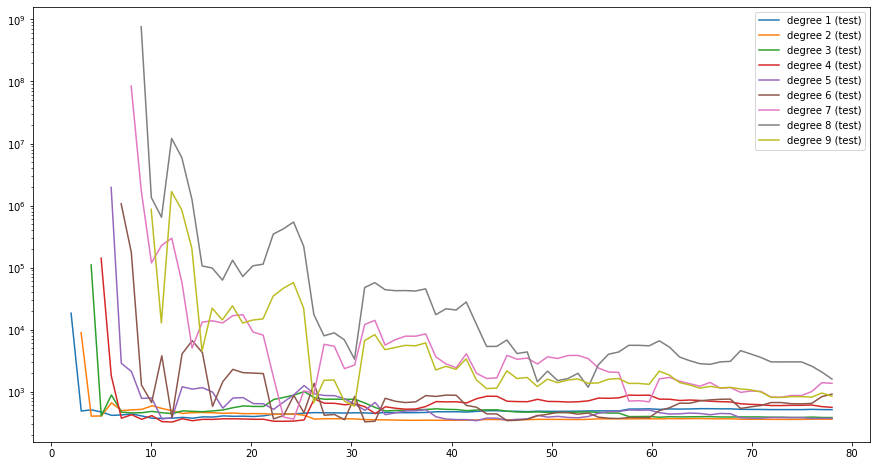

In [62]:
plt.figure(figsize=(15, 8))

test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(wind, ozone, test_size=test_size, random_state=42)

N = round(len(ozone) * (1-test_size))
my_dict = {}
for deg in range(1,10):
    
    X_train = get_design_mat(x_train, deg) #Create train set with degree d
    X_test = get_design_mat(x_test, deg) #Create test set with degree d
    
    my_dict[deg] = []
    est_error = []
    for i in range(1,N-deg):
        coefficients = least_square_estimator(X_train[0:deg+i,:], y_train[0:deg+i])
        
        est_error.append(empirical_risk(X_test, y_test, coefficients))
    
    my_dict[deg].append(coefficients)
    x = np.linspace(deg+1, N, N-(deg+1))
    plt.plot(x, est_error, label='degree %d (test)' %deg)
    plt.yscale("log")
    plt.legend()

In [63]:
my_dict

{1: [array([87.32332489, -4.3184099 ])],
 2: [array([158.40872588, -17.45371058,   0.54771871])],
 3: [array([ 2.40748543e+02, -4.09083098e+01,  2.57922201e+00, -5.40604759e-02])],
 4: [array([ 3.98570898e+02, -1.02824313e+02,  1.09820854e+01, -5.25531203e-01,
          9.30122788e-03])],
 5: [array([ 1.49708591e+02,  2.21018802e+01, -1.24805248e+01,  1.54752817e+00,
         -7.73499733e-02,  1.37774669e-03])],
 6: [array([ 8.53697787e+02, -4.00584127e+02,  8.73285784e+01, -1.03697166e+01,
          6.85029218e-01, -2.35110608e-02,  3.25309762e-04])],
 7: [array([ 1.30166062e+03, -7.16784980e+02,  1.78446173e+02, -2.43014351e+01,
          1.90917169e+00, -8.55074172e-02,  2.00595672e-03, -1.88682899e-05])],
 8: [array([ 1.57461169e+03, -9.38868280e+02,  2.54199334e+02, -3.84723491e+01,
          3.50243816e+00, -1.96004862e-01,  6.63317745e-03, -1.26095768e-04,
          1.05518560e-06])],
 9: [array([ 2.73394234e+02,  2.23738614e+02, -1.90079346e+02,  5.69821241e+01,
         -9.228

We can see that with a low N, the functions with higher degree tend to overfit and therefore have a higher generalization error but as we increase N, the algorithm zeros out the extra coefficients and reduces the error. That is why when d is increased, the estimation error is higher (when N is low) but as we increase N, the error goes down.